<a href="https://colab.research.google.com/github/djbradyAtOpticalSciencesArizona/computationalImaging/blob/master/coherence/ImagingWithPartiallyCoherentIllumination.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Imaging with Partially Coherent Illumination
## David Brady
## University of Arizona
## December 2022

We consider the image created by a partially coherent source prior to downsampling through the imaging system,
$$
{\tilde g}(x,\delta )= \int e^{\frac{2\pi i\Delta}{M\lambda F}\cdot (x-\delta )}
f(x+\Delta )f^\ast (x-\Delta ) W(\Delta ) d\Delta
$$

consider the smooth reflector with Gaussian apodization
\begin{equation}
  f(x)=e^{-2\pi i u_ox}e^{\frac{(x-x_o)^2}{\beta^2}}  
\end{equation}
Where $u_o$ is determined by the direction of the surface normal of the reflector.
We further assume that
$$w(\Delta x)=e^{-\frac{\Delta^2}{\sigma^2}}e^{-4\pi iu_s\Delta} $$
where $\sigma\approx \frac{M\lambda}{\Delta\theta}$, $\Delta \theta $ is the angular extent of the illumination source, and $u_s$ is the transverse wavenumber for the axis of incidence of the source. In this case
\begin{equation}
\begin{array}{ll}
{\tilde g}({\bar x},\delta )
&= e^{-\frac{2({\bar x}-x_o)^2}{\beta^2}}\int e^{\frac{2\pi i\Delta}{M\lambda F}\cdot \left ({\bar x}-\delta -2M\lambda F(u_o+u_s)\right )}
e^{-\frac{2\Delta^2}{\beta^2}} e^{-\frac{\Delta^2}{\sigma^2}}d\Delta \\
&=\sqrt{\frac{\pi}{a}} e^{-\frac{2({\bar x}-x_o)^2}{\beta^2}}e^{-\frac{({\bar x}-\delta-2M\lambda F (u_o+u_s))^2}{\gamma^2}}
\end{array}
\end{equation}
where $\gamma=\frac{M\lambda F}{\pi}\sqrt{\frac{1}{\sigma^2}+\frac{2}{\beta^2}}$.

This notebook plots ${\tilde g}$ as a function of ${\bar x}$ and $\delta$. For simplicity we assume $u_o=-u_s$ since changing $u_o$ or $u_s$ is equivalent to changing $\delta $.

## libraries

In [ ]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from google.colab import files
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 20]
plt.rcParams.update({'font.size': 22})

# plot of $g(x,\delta)$

parameters are set in the image plane. Let $\beta$ and $\sigma$ be in units of $\lambda $. We know that $\sigma\approx \frac{M\lambda}{\Delta \theta}$, where $\Delta \theta $ is the angular extent of the illumination source. We specify $F$ and the object range $R$. We need to specify the wavelength in meters to convert gamma into units of wavelengths.

In [ ]:
beta = .5
dTheta=0.001
F=0.05
R=100
M=F/R
print("M = ", M )
sigma=M/dTheta
lam=0.000001
print("sigma = ", sigma )
gamma=(M*F/np.pi)*np.sqrt(1./sigma**2+2./beta**2)/lam
print("gamma = ", gamma )



M =  0.0005
sigma =  0.5
gamma =  27.566444771089603


In [ ]:
def gam(R,F,dT,beta):
  #F in meters, gam in meters, beta in wavelengths
  M=F/R
  sig=M/dT
  gg=(M*F/np.pi)*np.sqrt(1/sigma**2+2/beta**2)
  return gg
def g(x,d):
  gg=np.exp(-2*x**2/beta**2)*np.exp(-(x-d)**2/gamma**2)
  return gg

<ipython-input-19-caf51bad8bc6>:5: RuntimeWarning: divide by zero encountered in true_divide
  gg=(M*F/np.pi)*np.sqrt(1/sigma**2+1/beta**2)


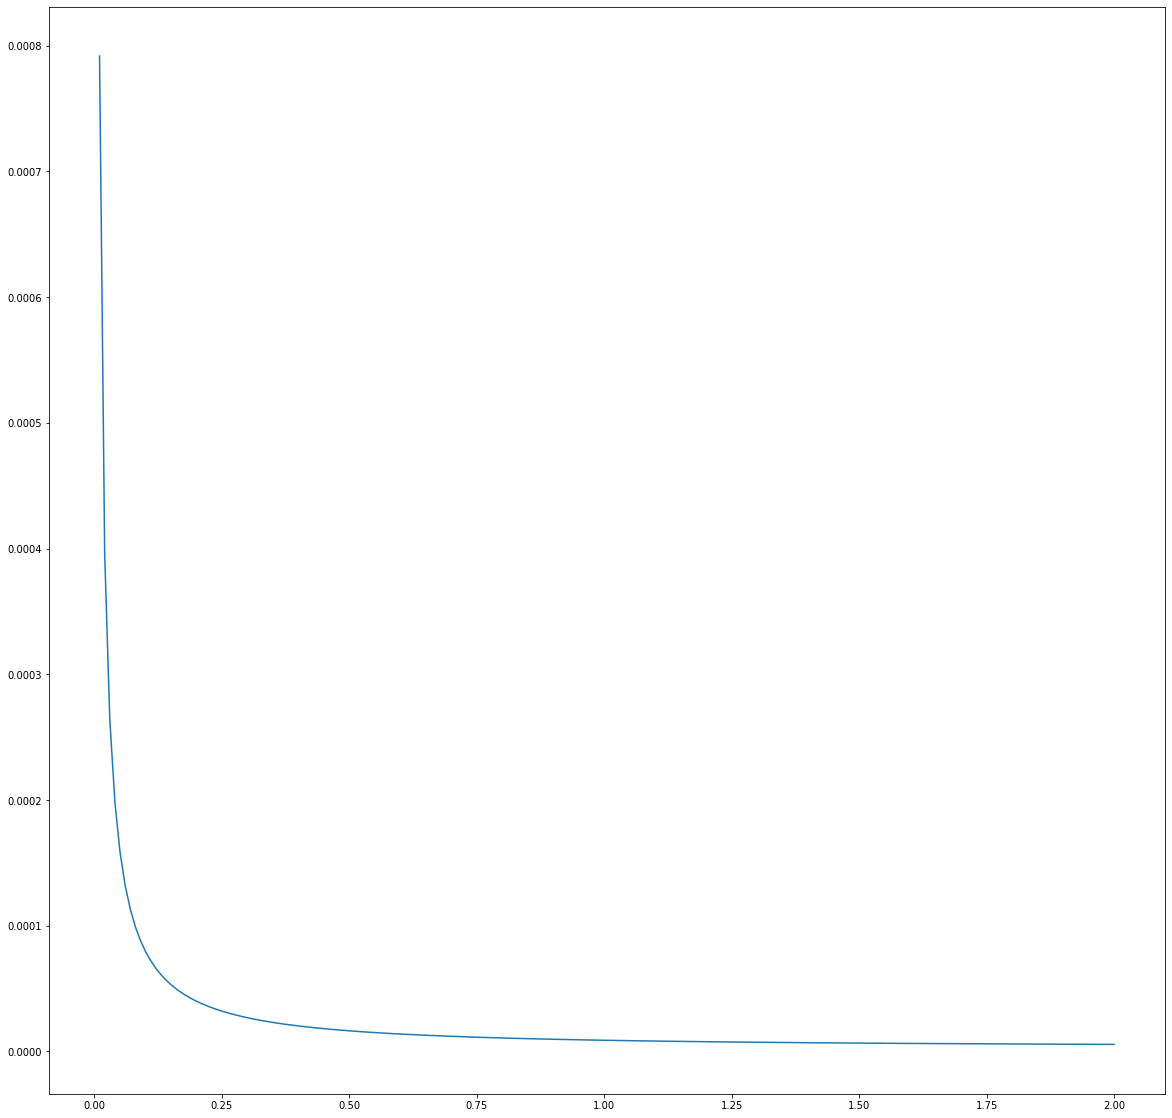

In [ ]:
beta=np.linspace(0,2,200)
plt.plot(beta,gam(100,0.05,.01,beta))

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

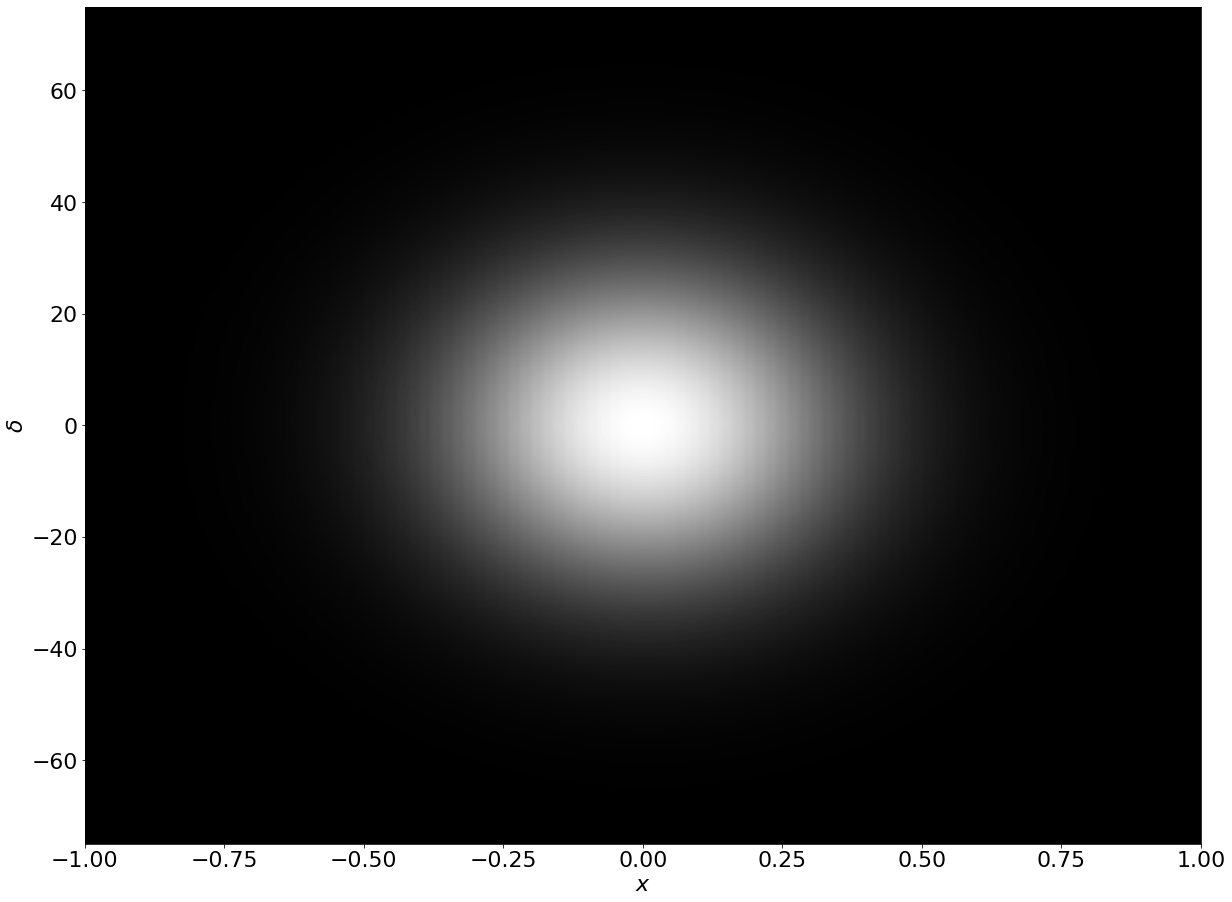

In [ ]:
dM=75
delta=np.linspace(-dM,dM,300)
xM=1
xo=np.linspace(-xM,xM,100)
x, d =np.meshgrid(xo,delta)
plt.imshow(g(x,d),cmap='gray', extent=[-xM,xM,-dM,dM],aspect=.01)
plt.ylabel("$\delta$")
plt.xlabel("$x$")
plt.savefig('tildeg.pdf')
files.download('tildeg.pdf')

In [ ]:
$\b